<a href="https://colab.research.google.com/github/2303A510j7/ADM/blob/main/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
file_path = '/content/employee_performance.csv'  # Adjust the path as necessary
df = pd.read_csv(file_path)

# Display the first few rows to understand the dataset
print("Dataset preview:")
print(df.head())

Dataset preview:
   Employee_ID  Department  Monthly_Salary  Years_of_Experience  \
0            1          HR       115382.10                   17   
1            2          HR        32428.50                    6   
2            3  Operations        48202.18                    9   
3            4          IT        39488.41                    1   
4            5          HR        64898.09                    6   

   Performance_Score  
0                 10  
1                  7  
2                 10  
3                  4  
4                  7  


In [2]:
# 2. Generate statistical summaries
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
       Employee_ID  Monthly_Salary  Years_of_Experience  Performance_Score
count   100.000000      100.000000           100.000000         100.000000
mean     50.500000    74155.081700            10.240000           5.500000
std      29.011492    24765.021112             5.778959           2.858622
min       1.000000    30634.090000             1.000000           1.000000
25%      25.750000    54103.632500             6.000000           3.000000
50%      50.500000    73622.835000            10.000000           6.000000
75%      75.250000    94087.112500            16.000000           8.000000
max     100.000000   119817.320000            20.000000          10.000000


In [3]:
# 3. Data Transformation and Aggregation

# 3.1 Data encoding: Convert categorical 'Department' column to numerical labels
df['Department_encoded'] = df['Department'].astype('category').cat.codes

In [6]:
# Ensure that 'Years_of_Experience' and 'Monthly_Salary' are numeric
df['Years_of_Experience'] = pd.to_numeric(df['Years_of_Experience'], errors='coerce')
df['Monthly_Salary'] = pd.to_numeric(df['Monthly_Salary'], errors='coerce')

# Replace zeros in 'Years_of_Experience' with 1 to avoid division by zero
df['Years_of_Experience'] = df['Years_of_Experience'].replace(0, 1)

# Now create the new derived column: Salary_Per_Experience
df['Salary_Per_Experience'] = df['Monthly_Salary'] / df['Years_of_Experience']

# Handle any NaN values in 'Salary_Per_Experience' by replacing them with 0
df['Salary_Per_Experience'] = df['Salary_Per_Experience'].fillna(0)

# Verify the result
print(df[['Employee_ID', 'Monthly_Salary', 'Years_of_Experience', 'Salary_Per_Experience']].head())


   Employee_ID  Monthly_Salary  Years_of_Experience  Salary_Per_Experience
0            1       115382.10                   17            6787.182353
1            2        32428.50                    6            5404.750000
2            3        48202.18                    9            5355.797778
3            4        39488.41                    1           39488.410000
4            5        64898.09                    6           10816.348333


In [7]:

# 3.3 Group and aggregate by department
department_summary = df.groupby('Department').agg(
    avg_salary=('Monthly_Salary', 'mean'),
    avg_performance=('Performance_Score', 'mean'),
    total_employees=('Employee_ID', 'count')
).reset_index()

# Print department-level summary
print("\nDepartment-level Aggregation Summary:")
print(department_summary)


Department-level Aggregation Summary:
   Department    avg_salary  avg_performance  total_employees
0     Finance  77424.422667         5.533333               15
1          HR  75454.913125         6.312500               16
2          IT  73841.640000         5.600000               20
3   Marketing  67350.616667         4.666667                9
4  Operations  73694.855000         5.791667               24
5       Sales  74699.896875         4.562500               16


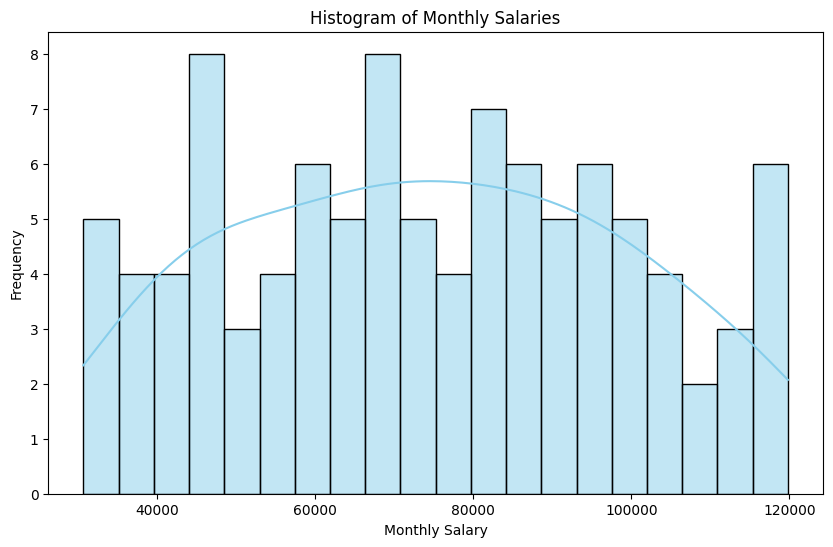

In [8]:

# 4.1 Histogram of Monthly Salaries
plt.figure(figsize=(10, 6))
sns.histplot(df['Monthly_Salary'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Monthly Salaries')
plt.xlabel('Monthly Salary')
plt.ylabel('Frequency')
plt.show()

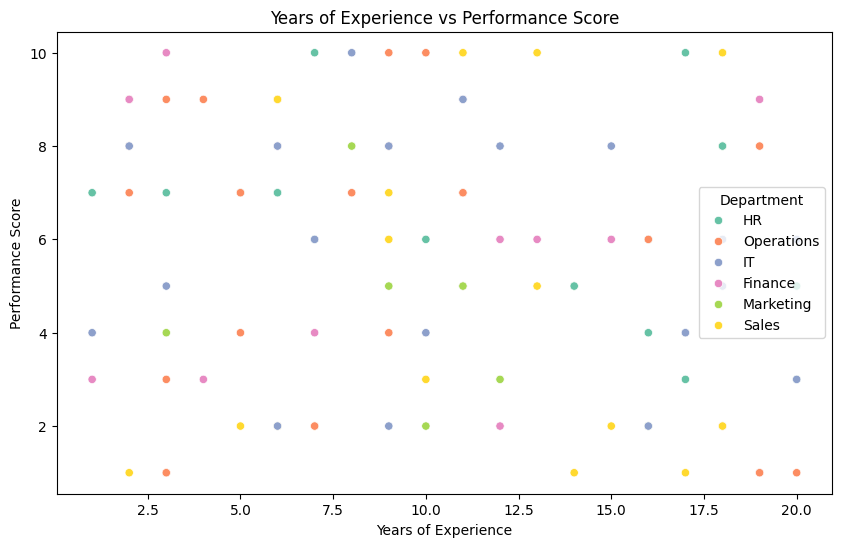

In [9]:
# 4.2 Scatter Plot: Years of Experience vs Performance Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Years_of_Experience', y='Performance_Score', hue='Department', palette='Set2')
plt.title('Years of Experience vs Performance Score')
plt.xlabel('Years of Experience')
plt.ylabel('Performance Score')
plt.legend(title='Department')
plt.show()

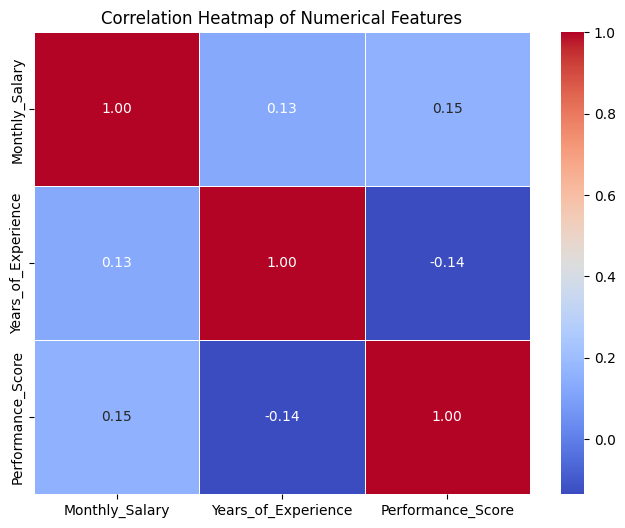

In [10]:

# 4.3 Heatmap of numerical features (Salary, Experience, Performance)
corr_matrix = df[['Monthly_Salary', 'Years_of_Experience', 'Performance_Score']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()